In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
df = pd.read_csv(r"C:\Users\user\Desktop\data_science\sec_sem 2023-2024\machine learning lab\IT_customer_churn.csv")
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.shape

(7043, 20)

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
for col in df.select_dtypes(include=['object']):
    print(f'{col}: {df[col].unique()}') 

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [6]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"] , errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df[df['TotalCharges'].isnull() & df['Churn'] == 'Yes']     

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [10]:
df_n = df.copy()

In [11]:
df.dropna(inplace = True)

In [12]:
df.isnull().sum().sum()

0

In [13]:
df.duplicated().sum()

22

In [14]:
df.drop_duplicates(inplace = True)

In [15]:
df.duplicated().sum()

0

In [16]:
n = df.select_dtypes(['float' , 'int'])
n.head()
n.dropna(inplace = True)

In [17]:
z_scores = stats.zscore(n)

threshold = 3

outliers = (np.abs(z_scores) > threshold) | np.abs(z_scores) < -threshold

outliers.sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

#### resampling data

In [18]:
df.Churn.value_counts()

Churn
No     5153
Yes    1857
Name: count, dtype: int64

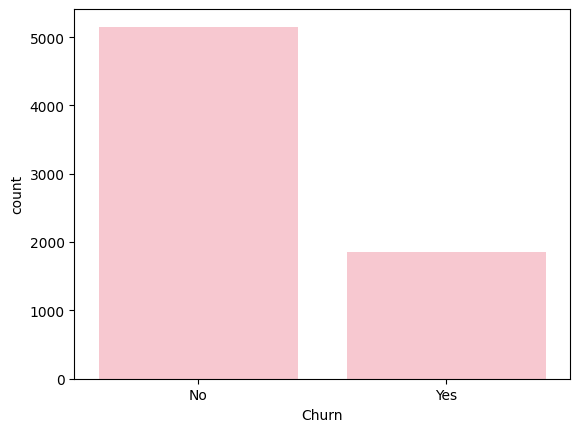

In [19]:
sns.countplot(data = df, x = 'Churn', color='pink');


In [20]:
x = df.drop(['Churn'] , axis = 1)  
y = df['Churn']  


<Axes: ylabel='count'>

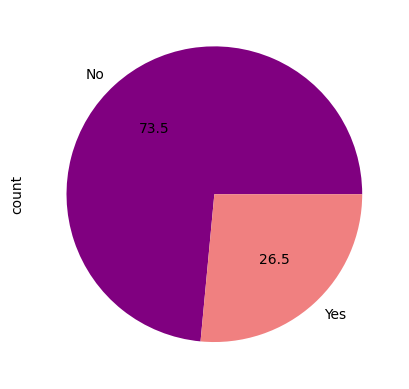

In [21]:
y.value_counts().plot.pie(autopct='%.1f', colors=['purple', 'lightcoral'])

In [22]:
sampling_strategy = {'No': 3200}

rus = RandomUnderSampler(random_state=42, sampling_strategy = sampling_strategy)

rus_x, rus_y = rus.fit_resample(x, y)

In [23]:
print('before undersampling : ' , y.value_counts())
print()
print('after undersampling : ' , rus_y.value_counts())

before undersampling :  Churn
No     5153
Yes    1857
Name: count, dtype: int64

after undersampling :  Churn
No     3200
Yes    1857
Name: count, dtype: int64


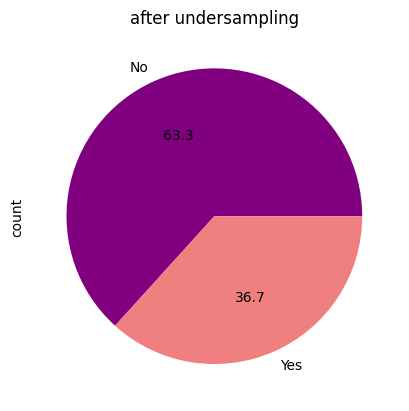

In [24]:
rus_y.value_counts().plot.pie(autopct = '%.1f', colors=['purple', 'lightcoral'])
plt.title('after undersampling')
plt.show()

In [25]:
sampling_strategy = {'Yes': 3200}

ros = RandomOverSampler(random_state=42, sampling_strategy = sampling_strategy)

ros_x, ros_y = ros.fit_resample(rus_x, rus_y)

In [26]:
print('before oversampling : ' , rus_y.value_counts())
print()
print('after oversampling : ' , ros_y.value_counts())

before oversampling :  Churn
No     3200
Yes    1857
Name: count, dtype: int64

after oversampling :  Churn
No     3200
Yes    3200
Name: count, dtype: int64


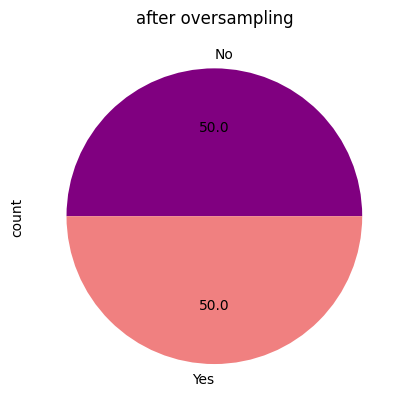

In [27]:
ros_y.value_counts().plot.pie(autopct = '%.1f', colors=['purple', 'lightcoral'])
plt.title('after oversampling')
plt.show()

In [28]:
columns = ['gender' , 'Partner' , 'Dependents' , 'PhoneService' , 'MultipleLines' , 'InternetService' , 'OnlineSecurity' , 'OnlineBackup' , 'DeviceProtection' , 'TechSupport' , 'StreamingTV' , 'StreamingMovies' , 'Contract' , 'PaperlessBilling' , 'PaymentMethod']
enc_x = pd.get_dummies(ros_x , columns = columns , dtype = 'float') 
enc_x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,48,20.05,1036.00,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,24,70.00,1732.60,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0,57,54.65,3134.70,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,5,25.45,134.75,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,47,58.90,2813.05,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,0,63,103.40,6603.00,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6396,0,8,100.85,819.55,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6397,1,11,104.05,1133.65,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6398,1,19,90.60,1660.00,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


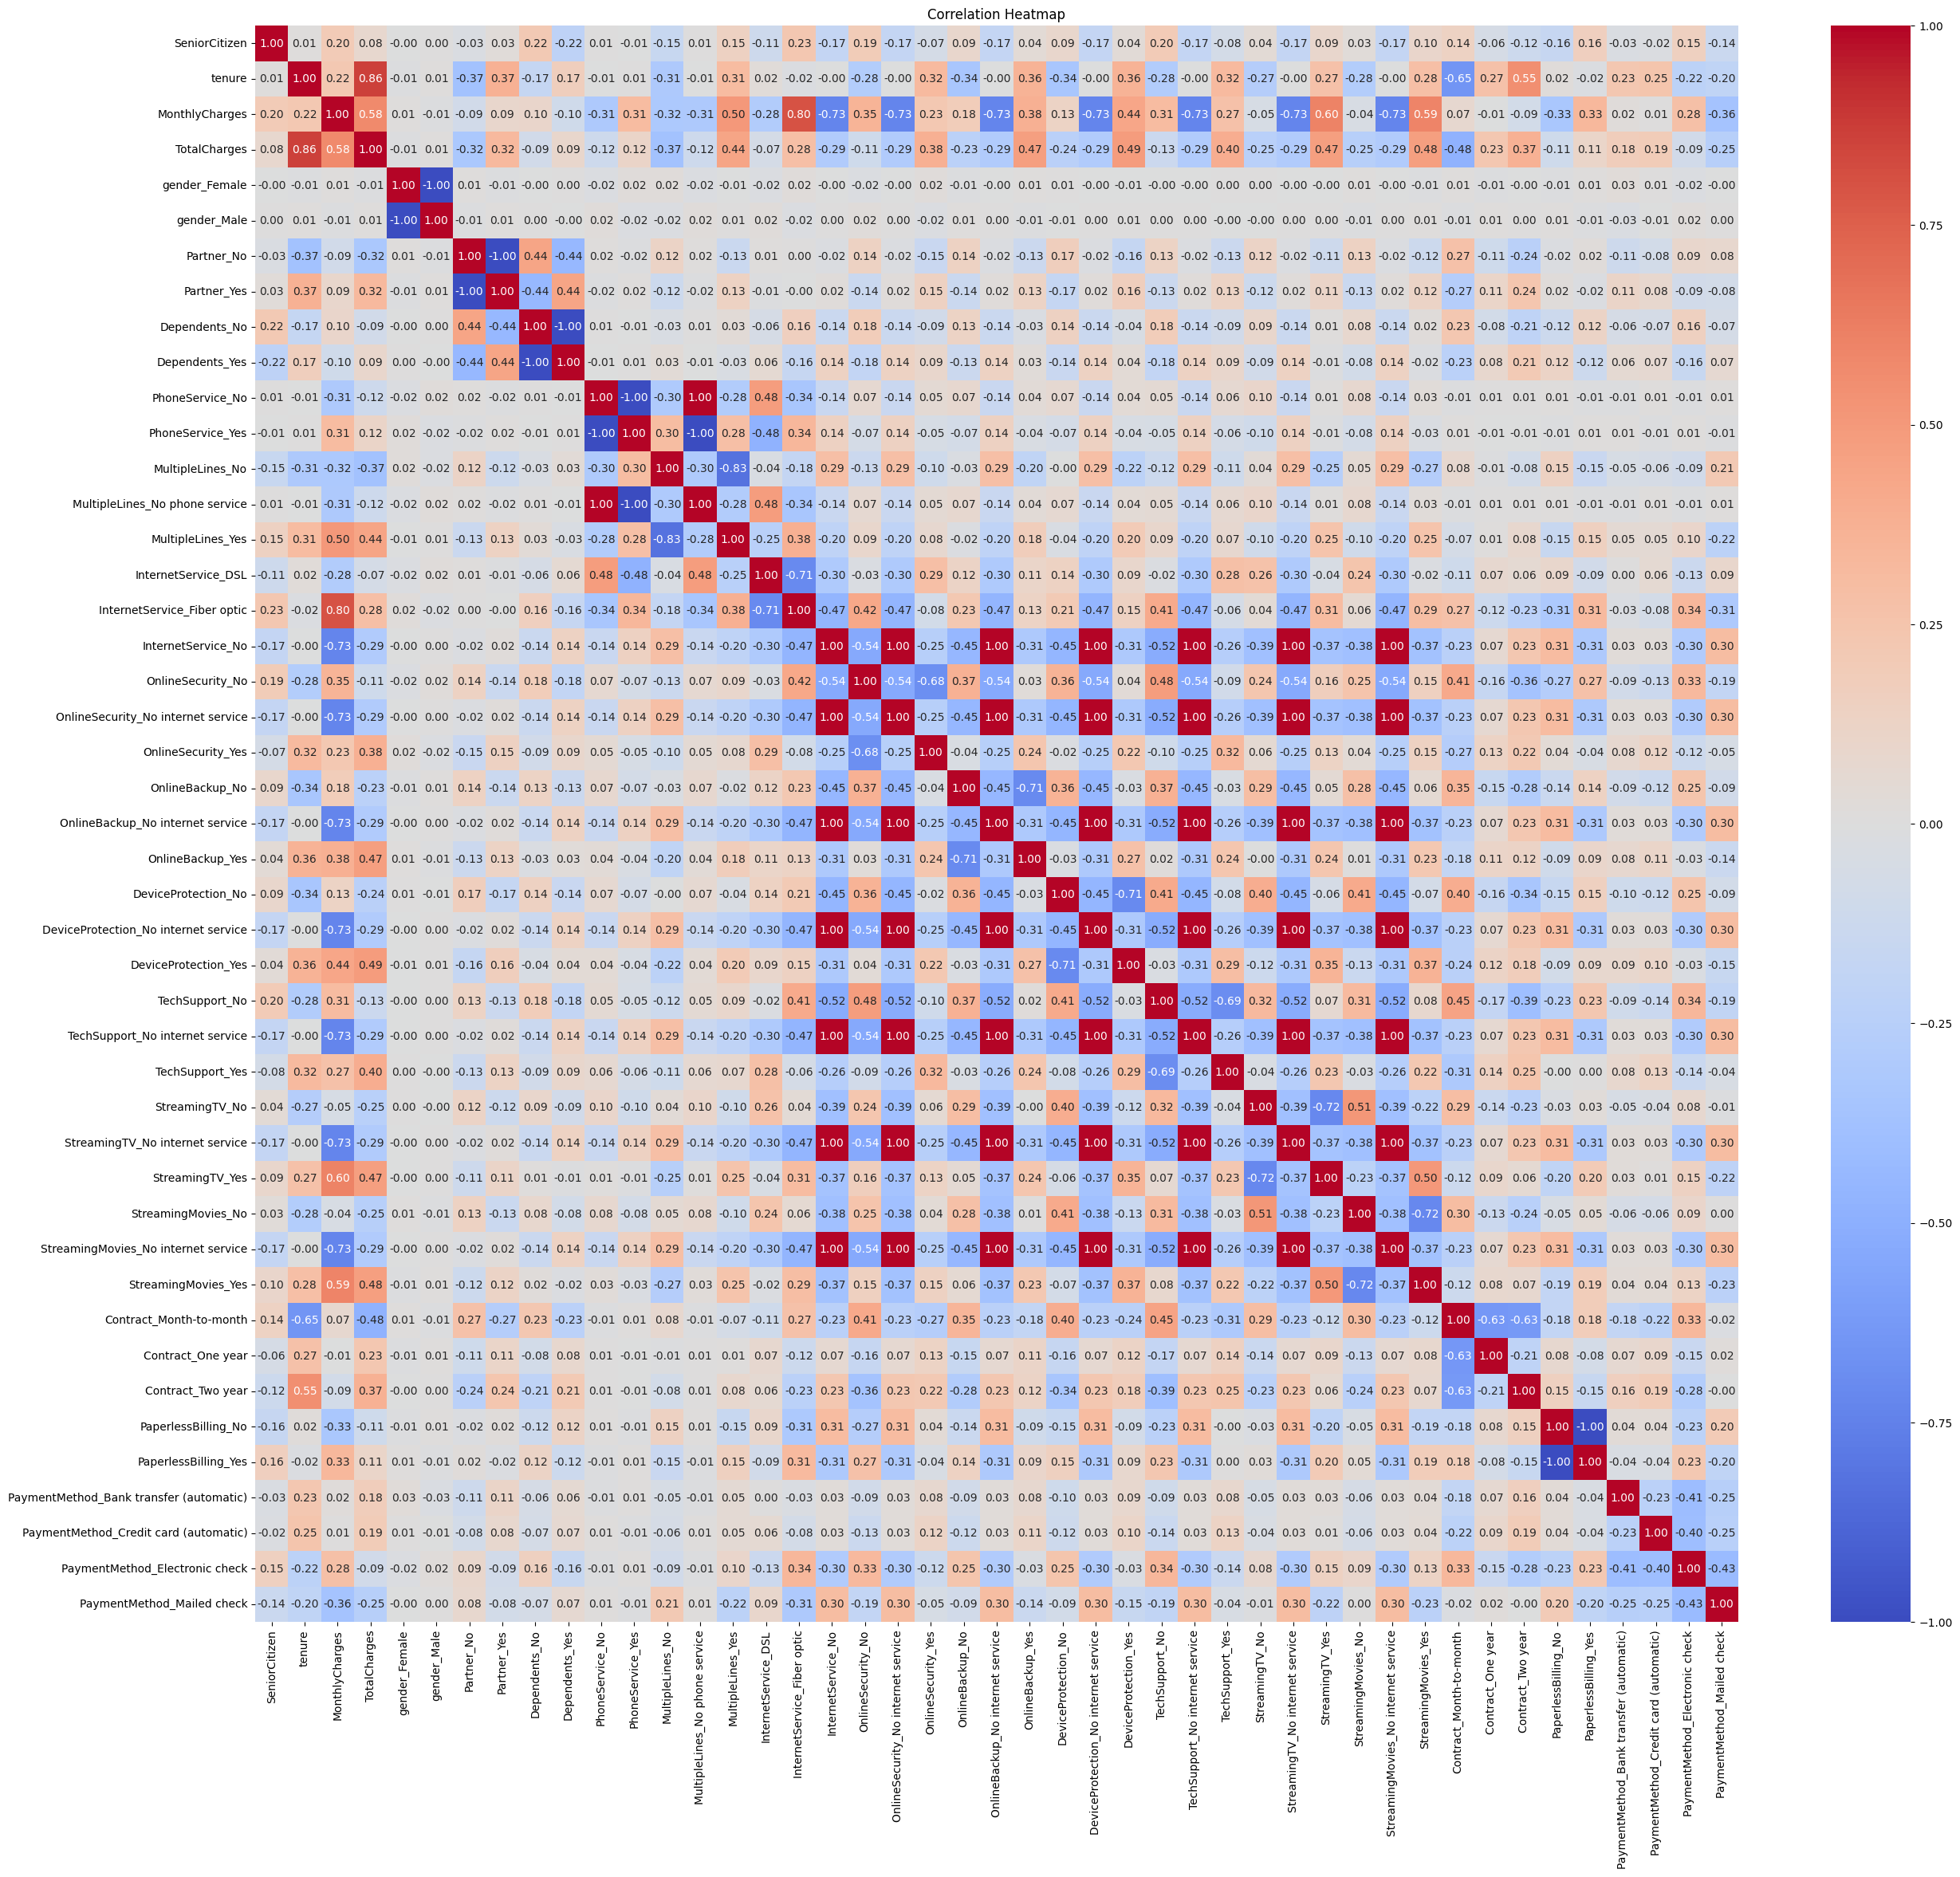

In [29]:
correlation_matrix = enc_x.corr()

plt.figure(figsize=(30, 26))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [30]:
label_encoder = LabelEncoder()
enc_y = label_encoder.fit_transform(ros_y)
enc_y

array([0, 0, 0, ..., 1, 1, 1])

In [31]:
x_train, x_test, y_train, y_test = train_test_split(enc_x, enc_y, test_size=0.27, random_state=42)

#### Bagging - Random Forest 

In [32]:
RF = RandomForestClassifier(n_estimators = 220 , random_state = 42)
RF.fit(x_train, y_train)

RandomForestClassifier(n_estimators=220, random_state=42)

In [33]:
pred = RF.predict(x_test)

In [34]:
acc_t = accuracy_score(y_test, pred)
prec_t = precision_score(y_test, pred)
rec_t = recall_score(y_test, pred)
f1_t = f1_score(y_test, pred)
auc_t = roc_auc_score(y_test, pred)
conf_t = confusion_matrix(y_test, pred)

In [35]:
print('accuracy : ' , acc_t )
print('precision : ' , prec_t )
print('recall : ' , rec_t )
print('f1_score : ' , f1_t )
print('roc_auc_score : ' , auc_t )
print('confusion_matrix : \n' , conf_t )

accuracy :  0.8234953703703703
precision :  0.784877529286475
recall :  0.8773809523809524
f1_score :  0.8285553681843733
roc_auc_score :  0.8249517374517374
confusion_matrix : 
 [[686 202]
 [103 737]]


#### Boosting - Gradient Boosting 

In [36]:
boost = GradientBoostingClassifier(n_estimators=220 , random_state = 42)
boost.fit(x_train, y_train)
pred_boost = boost.predict(x_test)

In [37]:
acc_b = accuracy_score(y_test, pred_boost)
prec_b = precision_score(y_test, pred_boost)
rec_b = recall_score(y_test, pred_boost)
f1_b = f1_score(y_test, pred_boost)
auc_b = roc_auc_score(y_test, pred_boost)
conf_b = confusion_matrix(y_test, pred_boost)

In [38]:
print('accuracy : ' , acc_b )
print('precision : ' , prec_b )
print('recall : ' , rec_b )
print('f1_score : ' , f1_b )
print('roc_auc_score : ' , auc_b )
print('confusion_matrix : \n' , conf_b )

accuracy :  0.78125
precision :  0.75
recall :  0.825
f1_score :  0.7857142857142857
roc_auc_score :  0.7824324324324324
confusion_matrix : 
 [[657 231]
 [147 693]]


#### Optimization

In [39]:
col = ['MonthlyCharges' , 'TotalCharges']
scaler = MinMaxScaler()
enc_x[col] = scaler.fit_transform(enc_x[col])
enc_x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,48,0.014985,0.117378,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,24,0.513986,0.197761,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0,57,0.360639,0.359555,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,5,0.068931,0.013380,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,47,0.403097,0.322438,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,0,63,0.847652,0.759774,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6396,0,8,0.822178,0.092401,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6397,1,11,0.854146,0.128646,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6398,1,19,0.719780,0.189384,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [40]:
k = 32
k_best = SelectKBest(f_classif, k=k)
x_sel = k_best.fit_transform(enc_x, enc_y)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x_sel, enc_y, test_size=0.2, random_state=42)

In [42]:
rf = RandomForestClassifier(n_estimators=220, random_state=42)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

In [43]:
rf_acc = accuracy_score(y_test, rf_pred)
rf_prec = precision_score(y_test, rf_pred)
rf_rec = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_pred)
rf_conf = confusion_matrix(y_test, rf_pred)

print("Random Forest : " , '\n')
print('Accuracy:', rf_acc)
print('Precision:', rf_prec)
print('Recall:', rf_rec)
print('F1 Score:', rf_f1)
print('ROC AUC Score:', rf_auc)
print('Confusion Matrix:\n', rf_conf)


Random Forest :  

Accuracy: 0.82578125
Precision: 0.7785714285714286
Recall: 0.8890701468189234
F1 Score: 0.8301599390708302
ROC AUC Score: 0.8283431693614857
Confusion Matrix:
 [[512 155]
 [ 68 545]]


In [44]:
'''gb = GradientBoostingClassifier(n_estimators=300, random_state=42)
gb.fit(x_train, y_train)
gb_pred = gb.predict(x_test)


gb_acc = accuracy_score(y_test, gb_pred)
gb_conf = confusion_matrix(y_test, gb_pred)
gb_prec = precision_score(y_test, gb_pred)
gb_rec = recall_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)
gb_auc = roc_auc_score(y_test, gb_pred)

print("Gradient Boosting : " , '\n')
print('Accuracy:', gb_acc)
print('Confusion Matrix:\n', gb_conf)
print('Precision:', gb_prec)
print('Recall:', gb_rec)
print('F1 Score:', gb_f1)
print('ROC AUC Score:', gb_auc)'''

'gb = GradientBoostingClassifier(n_estimators=300, random_state=42)\ngb.fit(x_train, y_train)\ngb_pred = gb.predict(x_test)\n\n\ngb_acc = accuracy_score(y_test, gb_pred)\ngb_conf = confusion_matrix(y_test, gb_pred)\ngb_prec = precision_score(y_test, gb_pred)\ngb_rec = recall_score(y_test, gb_pred)\ngb_f1 = f1_score(y_test, gb_pred)\ngb_auc = roc_auc_score(y_test, gb_pred)\n\nprint("Gradient Boosting : " , \'\n\')\nprint(\'Accuracy:\', gb_acc)\nprint(\'Confusion Matrix:\n\', gb_conf)\nprint(\'Precision:\', gb_prec)\nprint(\'Recall:\', gb_rec)\nprint(\'F1 Score:\', gb_f1)\nprint(\'ROC AUC Score:\', gb_auc)'

In [45]:
lgb = LGBMClassifier(n_estimators=300, learning_rate=0.1)
lgb.fit(x_train, y_train)
lg_pred = lgb.predict(x_test)

[LightGBM] [Info] Number of positive: 2587, number of negative: 2533
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 641
[LightGBM] [Info] Number of data points in the train set: 5120, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505273 -> initscore=0.021095
[LightGBM] [Info] Start training from score 0.021095


In [46]:
lg_acc = accuracy_score(y_test, lg_pred)
lg_prec = precision_score(y_test, lg_pred)
lg_rec = recall_score(y_test, lg_pred)
lg_f1 = f1_score(y_test, lg_pred)
lg_auc = roc_auc_score(y_test, lg_pred)
lg_conf = confusion_matrix(y_test, lg_pred)

print("Gradient Boosting : " , '\n')
print('Accuracy:', lg_acc)
print('Precision:', lg_prec)
print('Recall:', lg_rec)
print('F1 Score:', lg_f1)
print('ROC AUC Score:', lg_auc)
print('Confusion Matrix:\n', lg_conf)

Gradient Boosting :  

Accuracy: 0.81484375
Precision: 0.7647887323943662
Recall: 0.8858075040783034
F1 Score: 0.8208616780045351
ROC AUC Score: 0.8177163457423002
Confusion Matrix:
 [[500 167]
 [ 70 543]]


In [47]:
'''threshold = 0.25
gbc = LGBMClassifier(random_state=13)
gbc.fit(x_train, y_train)
igbc_k = np.where(gbc.predict_proba(x_test) > threshold)
igbc_k = igbc_k[1]
accuracy_score(y_test , igbc_k)
'''

'threshold = 0.25\ngbc = LGBMClassifier(random_state=13)\ngbc.fit(x_train, y_train)\nigbc_k = np.where(gbc.predict_proba(x_test) > threshold)\nigbc_k = igbc_k[1]\naccuracy_score(y_test , igbc_k)\n'

#### imputing missing values using knn

In [48]:
numeric = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
print('Before imputing missing values:\n', df_n.isnull().sum())

imputer = KNNImputer(n_neighbors=5)  

df_n[numeric] = imputer.fit_transform(df_n[numeric])

print('After imputing missing values:\n', df_n.isnull().sum())

Before imputing missing values:
 gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
After imputing missing values:
 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [49]:
x = df_n.drop(['Churn'] , axis = 1)   
y = df_n['Churn']

In [50]:
sampling_strategy = {'No': 3200}

rus = RandomUnderSampler(random_state=42, sampling_strategy = sampling_strategy)

rus_x, rus_y = rus.fit_resample(x, y)

In [51]:
sampling_strategy = {'Yes': 3200}

ros = RandomOverSampler(random_state=42, sampling_strategy = sampling_strategy)

ros_x, ros_y = ros.fit_resample(rus_x, rus_y)

In [52]:
cat_columns = ['gender' , 'Partner' , 'Dependents' , 'PhoneService' , 'MultipleLines' , 'InternetService' , 'OnlineSecurity' , 'OnlineBackup' , 'DeviceProtection' , 'TechSupport' , 'StreamingTV' , 'StreamingMovies' , 'Contract' , 'PaperlessBilling' , 'PaymentMethod']
enc_x = pd.get_dummies(ros_x , columns = cat_columns , dtype = 'float') 
enc_x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,20.15,20.15,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,72.0,19.30,1414.80,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,7.0,45.75,344.20,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,48.0,20.05,1036.00,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,13.0,70.15,886.70,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,0.0,2.0,79.75,164.50,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6396,0.0,1.0,70.65,70.65,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6397,1.0,55.0,98.80,5617.75,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6398,1.0,5.0,83.15,446.05,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [53]:
label_encoder = LabelEncoder()
enc_y = label_encoder.fit_transform(ros_y)
enc_y

array([0, 0, 0, ..., 1, 1, 1])

In [54]:
cols = ['MonthlyCharges' , 'TotalCharges']
scaler = MinMaxScaler()
enc_x[cols] = scaler.fit_transform(enc_x[cols])
enc_x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,0.017439,0.000150,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,72.0,0.008969,0.161084,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,7.0,0.272546,0.037543,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,48.0,0.016442,0.117373,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,13.0,0.515695,0.100145,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6395,0.0,2.0,0.611360,0.016807,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6396,0.0,1.0,0.520678,0.005977,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6397,1.0,55.0,0.801196,0.646080,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6398,1.0,5.0,0.645242,0.049296,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [55]:
x_train, x_test, y_train, y_test = train_test_split(enc_x, enc_y, test_size=0.2, random_state=42)

In [56]:
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

In [57]:
rf_acc = accuracy_score(y_test, rf_pred)
rf_prec = precision_score(y_test, rf_pred)
rf_rec = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_pred)
rf_conf = confusion_matrix(y_test, rf_pred)

print("Random Forest : " , '\n')
print('Accuracy:', rf_acc)
print('Precision:', rf_prec)
print('Recall:', rf_rec)
print('F1 Score:', rf_f1)
print('ROC AUC Score:', rf_auc)
print('Confusion Matrix:\n', rf_conf)

Random Forest :  

Accuracy: 0.846875
Precision: 0.8061674008810573
Recall: 0.8955954323001631
F1 Score: 0.848531684698609
ROC AUC Score: 0.8488471914124502
Confusion Matrix:
 [[535 132]
 [ 64 549]]


In [58]:
lgb = LGBMClassifier(n_estimators=300, learning_rate=0.1)
lgb.fit(x_train, y_train)
lg_pred = lgb.predict(x_test)
lgboosting_accuracy = accuracy_score(y_test, lg_pred)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2587, number of negative: 2533
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 5120, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505273 -> initscore=0.021095
[LightGBM] [Info] Start training from score 0.021095


In [59]:
lg_acc = accuracy_score(y_test, lg_pred)
lg_prec = precision_score(y_test, lg_pred)
lg_rec = recall_score(y_test, lg_pred)
lg_f1 = f1_score(y_test, lg_pred)
lg_auc = roc_auc_score(y_test, lg_pred)
lg_conf = confusion_matrix(y_test, lg_pred)

print(" LGBM : " , '\n')
print('Accuracy:', lg_acc)
print('Precision:', lg_prec)
print('Recall:', lg_rec)
print('F1 Score:', lg_f1)
print('ROC AUC Score:', lg_auc)
print('Confusion Matrix:\n', lg_conf)

 LGBM :  

Accuracy: 0.8265625
Precision: 0.783744557329463
Recall: 0.8809135399673735
F1 Score: 0.8294930875576036
ROC AUC Score: 0.8287626170601485
Confusion Matrix:
 [[518 149]
 [ 73 540]]


#### Comparing Random Forest Performance Before and After Optimization 

In [60]:
print('random forest before optimization : \n') 

print('accuracy : ' , acc_t )
print('precision : ' , prec_t )
print('recall : ' , rec_t )
print('f1_score : ' , f1_t )
print('roc_auc_score : ' , auc_t )
print('confusion_matrix : \n' , conf_t )

print("\n")

print("Random Forest after optimization : " , '\n')
print('Accuracy:', rf_acc)
print('Precision:', rf_prec)
print('Recall:', rf_rec)
print('F1 Score:', rf_f1)
print('ROC AUC Score:', rf_auc)
print('Confusion Matrix:\n', rf_conf)


random forest before optimization : 

accuracy :  0.8234953703703703
precision :  0.784877529286475
recall :  0.8773809523809524
f1_score :  0.8285553681843733
roc_auc_score :  0.8249517374517374
confusion_matrix : 
 [[686 202]
 [103 737]]


Random Forest after optimization :  

Accuracy: 0.846875
Precision: 0.8061674008810573
Recall: 0.8955954323001631
F1 Score: 0.848531684698609
ROC AUC Score: 0.8488471914124502
Confusion Matrix:
 [[535 132]
 [ 64 549]]


#### Comparing Gradient Boosting Performance Before and After Optimization 

In [61]:
print('LGBM before optimization : \n') 
print('accuracy : ' , acc_b )
print('precision : ' , prec_b )
print('recall : ' , rec_b )
print('f1_score : ' , f1_b )
print('roc_auc_score : ' , auc_b )
print('confusion_matrix : \n' , conf_b )

print("\n")

print("LGBM after optimization : " , '\n')
print('Accuracy:', lg_acc)
print('Precision:', lg_prec)
print('Recall:', lg_rec)
print('F1 Score:', lg_f1)
print('ROC AUC Score:', lg_auc)
print('Confusion Matrix:\n', lg_conf)

LGBM before optimization : 

accuracy :  0.78125
precision :  0.75
recall :  0.825
f1_score :  0.7857142857142857
roc_auc_score :  0.7824324324324324
confusion_matrix : 
 [[657 231]
 [147 693]]


LGBM after optimization :  

Accuracy: 0.8265625
Precision: 0.783744557329463
Recall: 0.8809135399673735
F1 Score: 0.8294930875576036
ROC AUC Score: 0.8287626170601485
Confusion Matrix:
 [[518 149]
 [ 73 540]]
